<a href="https://colab.research.google.com/github/pcbrom/perceptron-mlp-cnn/blob/main/perceptron_mlp_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problemas Lógicos: AND e OR**

As funções lógicas **AND** e **OR** são exemplos clássicos de classificação binária. Cada uma recebe dois valores binários como entrada e produz um único valor binário como saída.

---

## **Tabela-verdade**

| $x_1$ | $x_2$ | AND | OR |
|------:|------:|----:|---:|
|   0   |   0   |  0  |  0 |
|   0   |   1   |  0  |  1 |
|   1   |   0   |  0  |  1 |
|   1   |   1   |  1  |  1 |

## **Pontos principais**

- Ambas são **linearmente separáveis** no plano $x_1 \times x_2$.
- Podem ser resolvidas com **um único neurônio (perceptron de camada única)**.
- Utiliza-se uma **função de ativação degrau**, como $\text{step}(z)$.
- São adequadas para introduzir os conceitos básicos de aprendizado supervisionado.

---

## **Expressão do perceptron**

A saída de um perceptron binário é definida por:

$$
y = \text{step}(\mathbf{w}^\top \mathbf{x})
$$

Onde:

- $\mathbf{x} = \begin{bmatrix} 1 \\ x_1 \\ x_2 \end{bmatrix}$,$\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix}$,
- O primeiro elemento representa o viés.
- $\phi(z) =
    \begin{cases}
    1, & \text{se } z \geq 0 \\
    0, & \text{se } z < 0
    \end{cases}
  $
- A função $\phi(z)$ retorna $1$ se $z \ge 0$ e $0$ caso contrário.

## **Representação geométrica**

No espaço bidimensional $(x_1, x_2)$, os pontos correspondentes às entradas podem ser separados por uma reta. Essa separabilidade é uma condição essencial para o funcionamento do perceptron simples.

## **Equação da fronteira de decisão**

A saída do perceptron é dada por:

$$
y = \phi(w_0 + w_1 x_1 + w_2 x_2)
$$

A **fronteira de decisão** ocorre quando o argumento da função de ativação é igual a zero:

$$
w_0 + w_1 x_1 + w_2 x_2 = 0
$$

Isolando $x_2$, obtemos a equação da reta:

$$
x_2 = \frac{-w_0 - w_1 x_1}{w_2}
$$

Essa equação define uma linha no plano $(x_1, x_2)$, separando as regiões onde o perceptron gera saída 0 ou 1.

## **Interpretação**
- O vetor $\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$ define a **orientação** da reta de separação no plano de entrada $(x_1, x_2)$.
- O termo de viés $w_0$ controla o **deslocamento da reta** em relação à origem.
- A função de ativação $\phi(z)$ atua como um **limiar de decisão**, classificando os pontos com base no lado da reta em que se encontram.


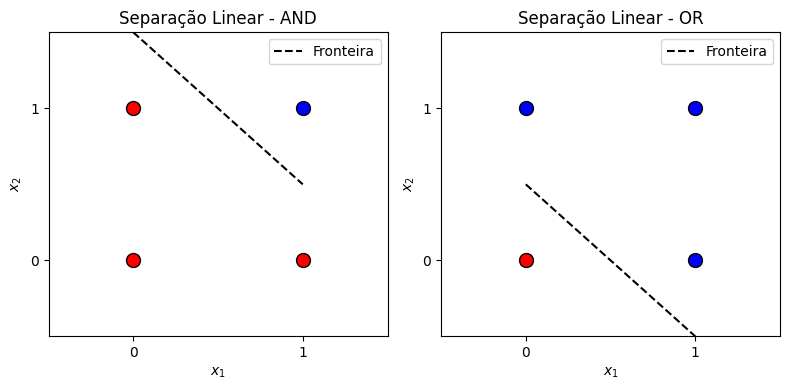

In [1]:
# @title Representação geométrica: Funções AND e OR
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Saídas desejadas
y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])

# Parâmetros dos hiperplanos
params = {
    'AND': {'bias': -1.5, 'weights': [1, 1], 'y': y_and},
    'OR':  {'bias': -0.5, 'weights': [1, 1], 'y': y_or}
}

# Criar figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax, gate in zip(axes, ['AND', 'OR']):
    y = params[gate]['y']
    w0 = params[gate]['bias']
    w1, w2 = params[gate]['weights']

    for i, label in enumerate(y):
        color = 'red' if label == 0 else 'blue'
        ax.scatter(X[i, 0], X[i, 1], color=color, s=100, edgecolor='k')

    x_vals = np.array([0, 1])
    y_vals = ( -w0 - w1 * x_vals ) / w2
    ax.plot(x_vals, y_vals, '--k', label='Fronteira')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'Separação Linear - {gate}')
    ax.legend()
    ax.grid(False)

plt.tight_layout()
plt.show()


# **Problema Lógico: XOR**

---

O operador lógico **XOR** (exclusive OR) é definido por:

$$
  \text{XOR}(x_1, x_2) =
  \begin{cases}
  1, & \text{se } x_1 \neq x_2 \\
  0, & \text{caso contrário}
  \end{cases}
$$

## **Tabela-verdade**

| $x_1$ | $x_2$ | XOR |
|------:|------:|----:|
|   0   |   0   | 0   |
|   0   |   1   | 1   |
|   1   |   0   | 1   |
|   1   |   1   | 0   |

## **Características do problema**

- O conjunto de pontos **não é linearmente separável**.
- Nenhuma reta consegue dividir corretamente as classes 0 e 1 no plano $(x_1, x_2)$.
- Portanto, **um único neurônio (perceptron simples)** não é suficiente.

## **Solução: Criar camadas ocultas**

A rede para resolver o problema XOR requer:

- **Uma ou mais camadas intermediárias** com pelo menos **dois neurônios**.
- Uma **função de ativação** não linear $\phi$ aplicada na camada oculta.
- Um **neurônio final** que combina os resultados da camada intermediária.

## **Correção de erro (aprendizado)**

Para cada amostra $(\mathbf{x}, y)$, com $\mathbf{x} \in \mathbb{R}^{n}$ e $y \in \{0,1\}$, usamos a seguinte regra para ajustar os pesos:

1. Calcular a predição $\hat{y} = \phi(\mathbf{w}^\top \mathbf{x})$  
2. Calcular o erro:  
   $$
   \delta = y - \hat{y}
   $$
3. Atualizar os pesos:  
   $$
   \mathbf{w} \leftarrow \mathbf{w} + \eta \cdot \delta \cdot \mathbf{x}
   $$

Onde:

- $\eta > 0$ é a taxa de aprendizado
- $\delta$ é o erro de predição
- A correção é proporcional ao erro e às entradas

---

Essa é a base da **regra de Hebb corrigida** ou **regra delta**, usada na retropropagação. No caso da MLP, o mesmo princípio é estendido para as camadas ocultas com o uso da **regra da cadeia** na derivação do erro.

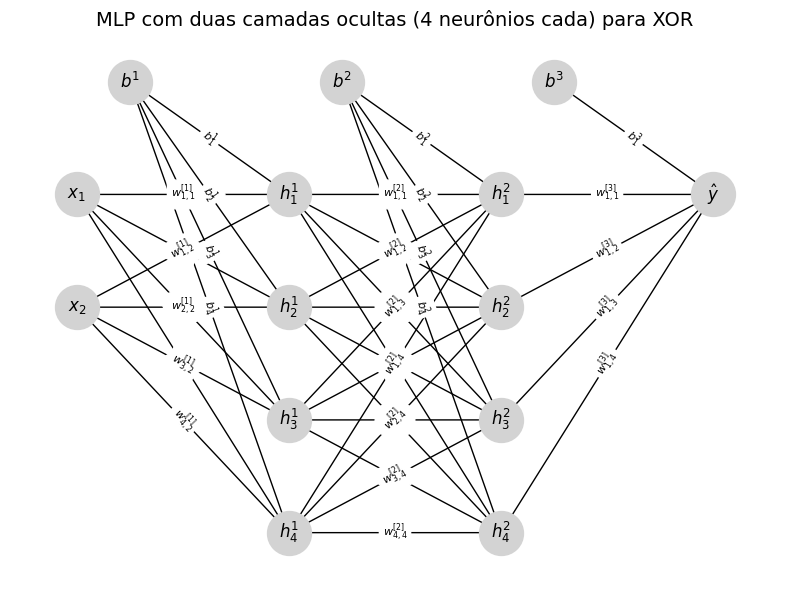

In [2]:
# @title MLP com duas camadas ocultas (4 neurônios cada) para XOR

import matplotlib.pyplot as plt
import networkx as nx

# Criar grafo direcionado
G = nx.DiGraph()

# Camadas
input_layer = ['x_1', 'x_2']
hidden_layer1 = [f'h^1_{i}' for i in range(1, 5)]
hidden_layer2 = [f'h^2_{i}' for i in range(1, 5)]
output_layer = ['\\hat{y}']

# Adicionar nós e posições
layers = [input_layer, hidden_layer1, hidden_layer2, output_layer]
positions = {}
labels = {}
layer_dist = 2
node_dist = 1

for i, layer in enumerate(layers):
    for j, node in enumerate(layer):
        G.add_node(node)
        positions[node] = (i * layer_dist, -j * node_dist)
        labels[node] = f"${node}$"

# Conectar camadas com rótulos LaTeX para pesos
def connect_layers_with_labels(layer1, layer2, w_prefix):
    for i, u in enumerate(layer1):
        for j, v in enumerate(layer2):
            edge_label = f"${w_prefix}_{{{j+1},{i+1}}}$"
            G.add_edge(u, v, label=edge_label)

connect_layers_with_labels(input_layer, hidden_layer1, 'w^{[1]}')
connect_layers_with_labels(hidden_layer1, hidden_layer2, 'w^{[2]}')
connect_layers_with_labels(hidden_layer2, output_layer, 'w^{[3]}')

# Adicionar bias como nós isolados e rótulos
for i, layer in enumerate([hidden_layer1, hidden_layer2, output_layer], start=1):
    b_node = f'b^{i}'
    G.add_node(b_node)
    positions[b_node] = (positions[layer[0]][0] - 1.5, positions[layer[0]][1] + 1.0)
    labels[b_node] = f"${b_node}$"
    for j, v in enumerate(layer):
        bias_label = f"$b^{i}_{{{j+1}}}$"
        G.add_edge(b_node, v, label=bias_label, style='dotted')

# Desenhar grafo
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, positions, node_color='lightgray', node_size=1000)
nx.draw_networkx_edges(G, positions, arrows=True, arrowstyle='-|>', width=1)

# Desenhar arestas com rótulos LaTeX
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels, font_size=8)

# Desenhar rótulos dos nós
nx.draw_networkx_labels(G, positions, labels, font_size=12)

plt.title('MLP com duas camadas ocultas (4 neurônios cada) para XOR', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


# **Backpropagation em MLP**

- O algoritmo de backpropagation é utilizado para calcular os gradientes dos pesos de uma rede neural, permitindo sua atualização via descida do gradiente.
- No contexto da resolução do problema XOR com uma MLP contendo duas camadas ocultas e função de ativação sigmoide, o procedimento segue as etapas abaixo.

---

## **1. Arquitetura**

A rede utilizada possui:

- Entrada: $\mathbf{x} \in \mathbb{R}^2$
- 1ª camada oculta: $4$ neurônios
- 2ª camada oculta: $4$ neurônios
- Saída: $1$ neurônio

Com pesos e viés:

- $\mathbf{W}_1 \in \mathbb{R}^{2 \times 4}$ e $\mathbf{b}_1 \in \mathbb{R}^{1 \times 4}$
- $\mathbf{W}_2 \in \mathbb{R}^{4 \times 4}$ e $\mathbf{b}_2 \in \mathbb{R}^{1 \times 4}$
- $\mathbf{W}_3 \in \mathbb{R}^{4 \times 1}$ e $\mathbf{b}_3 \in \mathbb{R}^{1 \times 1}$

## **2. Forward pass**

O cálculo da saída $\hat{y}$ da rede é feito em três etapas:

1. Primeira camada oculta:
   $$
   \mathbf{Z}_1 = \mathbf{x} \mathbf{W}_1 + \mathbf{b}_1 \\
   \mathbf{A}_1 = \phi(\mathbf{Z}_1)
   $$

2. Segunda camada oculta:
   $$
   \mathbf{Z}_2 = \mathbf{A}_1 \mathbf{W}_2 + \mathbf{b}_2 \\
   \mathbf{A}_2 = \phi(\mathbf{Z}_2)
   $$

3. Camada de saída:
   $$
   \mathbf{Z}_3 = \mathbf{A}_2 \mathbf{W}_3 + \mathbf{b}_3 \\
   \hat{y} = \phi(\mathbf{Z}_3)
   $$

Onde $\phi(z) = \dfrac{1}{1 + e^{-z}}$ é a função sigmoide.

## **3. Cálculo do erro**

O erro é definido pela função de perda quadrática média (MSE):

$$
\mathcal{L} = \frac{1}{2}(y - \hat{y})^2
$$

O gradiente da perda em relação à saída é:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}_3} = (\hat{y} - y) \cdot \phi'(\mathbf{Z}_3)
$$

## **4. Backward pass (retropropagação)**

O erro é propagado da saída para as camadas ocultas usando a regra da cadeia:

- Camada 3 (saída):
  $$
  \delta_3 = (\hat{y} - y) \cdot \phi'(\mathbf{Z}_3)
  $$
  $$
  \nabla_{\mathbf{W}_3} = \mathbf{A}_2^\top \delta_3 \\
  \nabla_{\mathbf{b}_3} = \delta_3
  $$

- Camada 2:
  $$
  \delta_2 = \delta_3 \mathbf{W}_3^\top \cdot \phi'(\mathbf{Z}_2)
  $$
  $$
  \nabla_{\mathbf{W}_2} = \mathbf{A}_1^\top \delta_2 \\
  \nabla_{\mathbf{b}_2} = \delta_2
  $$

- Camada 1:
  $$
  \delta_1 = \delta_2 \mathbf{W}_2^\top \cdot \phi'(\mathbf{Z}_1)
  $$
  $$
  \nabla_{\mathbf{W}_1} = \mathbf{x}^\top \delta_1 \\
  \nabla_{\mathbf{b}_1} = \delta_1
  $$

## **5. Atualização dos pesos**

Os pesos são atualizados com descida do gradiente:

$$
\mathbf{W}_i \leftarrow \mathbf{W}_i - \eta \nabla_{\mathbf{W}_i}, \\
\mathbf{b}_i \leftarrow \mathbf{b}_i - \eta \nabla_{\mathbf{b}_i}
$$

Para $i = 1, 2, 3$, onde $\eta$ é a taxa de aprendizado.

---

Esse processo é repetido para cada época até que o erro da rede seja suficientemente pequeno ou a acurácia atinja o valor desejado.


In [3]:
# Hiperparâmetros
eta = 1.0    # teste com outros valores (exercício)
epochs = 100 # teste com 100, 300, 600  (exercício)

Acurácia no conjunto de treino: 0.50


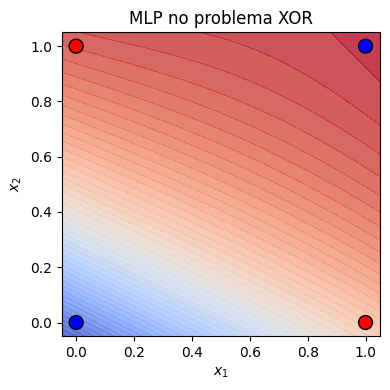

In [4]:
# @title MLP com duas camadas ocultas (4 neurônios cada) para XOR

import numpy as np
import matplotlib.pyplot as plt

# Dados XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])

# Função sigmoide e derivada
def phi(z):
    return 1 / (1 + np.exp(-z))

def dphi(z):
    s = phi(z)
    return s * (1 - s)

# Inicialização
np.random.seed(42)
W1 = np.random.randn(2, 4)
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 4)
b2 = np.zeros((1, 4))
W3 = np.random.randn(4, 1)
b3 = np.zeros((1, 1))

# Treinamento
for epoch in range(epochs):
    # Forward
    Z1 = X @ W1 + b1
    A1 = phi(Z1)
    Z2 = A1 @ W2 + b2
    A2 = phi(Z2)
    Z3 = A2 @ W3 + b3
    A3 = phi(Z3)

    # Backward
    dZ3 = (A3 - y) * dphi(Z3)
    dW3 = A2.T @ dZ3
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dZ2 = dZ3 @ W3.T * dphi(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = dZ2 @ W2.T * dphi(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Atualização
    W3 -= eta * dW3
    b3 -= eta * db3
    W2 -= eta * dW2
    b2 -= eta * db2
    W1 -= eta * dW1
    b1 -= eta * db1

# Avaliação
y_pred = (A3 > 0.5).astype(int)
acc = np.mean(y_pred == y)
print(f"Acurácia no conjunto de treino: {acc:.2f}")

# Visualização
xx, yy = np.meshgrid(np.linspace(-0.05, 1.05, 300), np.linspace(-0.05, 1.05, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z1g = grid @ W1 + b1
A1g = phi(Z1g)
Z2g = A1g @ W2 + b2
A2g = phi(Z2g)
Z3g = A2g @ W3 + b3
A3g = phi(Z3g)
Z_plot = A3g.reshape(xx.shape)

plt.figure(figsize=(4, 4))
plt.contourf(xx, yy, Z_plot, levels=50, cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolor='k', s=100)
plt.title('MLP no problema XOR')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.grid(False)
plt.tight_layout()
plt.show()


# **Treinamento, Validação e Teste em Redes Neurais**

O processo de desenvolvimento de um modelo de rede neural envolve três etapas:
- **1. Treinamento**
- **2. Validação**
- **3. Teste**

---

## **1. Conjunto de treinamento**

O conjunto de **treinamento** é utilizado para ajustar os pesos e os bias da rede neural. Durante essa etapa, o algoritmo de aprendizado (como o backpropagation com descida do gradiente) calcula os gradientes da função de perda e atualiza os parâmetros com o objetivo de minimizar o erro.

- A rede vê repetidamente os dados do conjunto de treinamento.
- O erro é diretamente utilizado para retropropagação.
- A qualidade da generalização não é avaliada aqui.


## **2. Conjunto de validação**

O conjunto de **validação** serve para acompanhar o desempenho do modelo em dados **não vistos durante o treinamento**, permitindo:

- Detectar **overfitting**, quando a rede memoriza os dados de treino mas falha em generalizar.
- Realizar ajustes de **hiperparâmetros**, como número de camadas, taxa de aprendizado, função de ativação, $\cdots$.
- Avaliar o ponto de parada (early stopping), ou seja, interromper o treinamento quando o desempenho na validação começar a piorar.

**OBS:** O modelo **não é atualizado** com os dados de validação, sua única função é medir.


## **3. Conjunto de teste**

O conjunto de **teste** é utilizado apenas **uma única vez**, após o treinamento e validação, para estimar o desempenho final do modelo. Esse conjunto simula o comportamento da rede diante de dados totalmente novos, representando o uso real do sistema.

- Nenhum ajuste adicional é feito nessa etapa.
- Mede a **capacidade de generalização** do modelo.


## **Importância da separação**

Dividir os dados nessas três partes evita que o modelo se adapte de forma excessiva ao conjunto de treinamento, o que comprometeria sua capacidade de generalizar. Uma prática comum é:

- **70%** para treino
- **15%** para validação
- **15%** para teste

Essa divisão pode ser ajustada conforme o tamanho do conjunto de dados.

---

## **TensorFlow Playground**

Para explorar de forma interativa o comportamento de redes neurais com diferentes arquiteturas e divisões de dados:

[https://playground.tensorflow.org](https://playground.tensorflow.org)

Nesta ferramenta é possível:

- Escolher a função de ativação, taxa de aprendizado, regularização e ruído.
- Visualizar as regiões de decisão em tempo real.
- Ativar/desativar o uso de dados de validação.
- Controlar o número de neurônios e camadas ocultas.

É uma excelente forma de observar visualmente os efeitos do **overfitting**, da **regularização** e do **número de épocas** no desempenho da rede.


# **MLP com Descida do Gradiente: Clássica e Estocástica**

- O treinamento de redes neurais consiste em encontrar os pesos $\mathbf{W}$ e bias $\mathbf{b}$ que minimizam uma função de custo $\mathcal{L}(\theta)$, onde $\theta$ representa o conjunto de parâmetros da rede.
- Esse processo é feito iterativamente por meio de um método de otimização, sendo o mais comum o **Gradient Descent**.

---

## **1. Descida do gradiente - Clássica ou Batch Gradient Descent**

- A descida do gradiente clássica atualiza os pesos com base no **gradiente da função de perda calculado sobre todo o conjunto de treinamento**.

Formalmente, dado um dataset com $n$ exemplos $\big( x^{(i)}, y^{(i)} \big), i=1,2,3, \cdots, n$, a atualização segue:
$$
\theta \leftarrow \theta - \eta \cdot \nabla_\theta \mathcal{L}(\theta)
$$

onde:
- $\theta$ representa todos os pesos e bias da rede.
- $\eta > 0$ é a **taxa de aprendizado**.
- $\nabla_\theta \mathcal{L}(\theta)$ é o gradiente da função de perda **sobre todos os dados**.

**Vantagens:**

- Caminho mais estável em direção ao mínimo.
- Convergência suave.

**Desvantagens:**

- Alto custo computacional em grandes datasets.
- Pode ser lento para aplicações em tempo real.


## **2. Descida do gradiente estocástica - Stochastic Gradient Descent (SGD)**

Na versão **estocástica**, os parâmetros são atualizados **a cada amostra** do dataset:
$$
\theta \leftarrow \theta - \eta \cdot \nabla_\theta \mathcal{L}^{(i)}(\theta)
$$

onde $\mathcal{L}^{(i)}$ é a perda associada à $i$-ésima amostra.

- O termo **estocástico** refere-se ao fato de que o gradiente é calculado com ruído.

**Vantagens:**

- Atualizações rápidas e mais frequentes.
- Pode escapar de mínimos locais devido à variação estocástica.
- Útil para treinamento online e grandes volumes de dados.

**Desvantagens:**

- O caminho até o mínimo pode oscilar fortemente.
- Necessita de técnicas como **momentum** ou **decaimento de taxa de aprendizado** para estabilizar.


## **3. Mini-Batch Gradient Descent - proposta intermediária**

Uma abordagem intermediária entre as duas anteriores é o **mini-batch gradient descent**, em que os parâmetros são atualizados com base no gradiente calculado sobre um pequeno subconjunto do dataset (por exemplo, 32 ou 64 amostras).

# **Diagnóstico de Diabetes com Redes Neurais**

Nesta atividade, vamos trabalhar com um problema aplicado de **classificação binária**: prever se uma pessoa possui ou não diabetes com base em um conjunto de variáveis clínicas.

[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

---

## **Contexto**

- O dataset utilizado é o **Pima Indians Diabetes Dataset**, coletado originalmente pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais dos Estados Unidos.
- Ele contém registros de mulheres com pelo menos 21 anos de idade da população Pima, um grupo étnico nativo norte-americano com alta incidência de diabetes tipo 2.

## **Objetivo**

O objetivo é treinar uma MLP para prever a presença de diabetes a partir de atributos fisiológicos e laboratoriais.

## **Variáveis de entrada**

Cada observação contém os seguintes atributos:

1. **Pregnancies**, number of times pregnant: Variável discreta.
2. **Glucose**, plasma glucose concentration after 2 hours in an oral glucose tolerance test: Variável contínua.
3. **BloodPressure**, diastolic blood pressure, in mm Hg: Variável contínua.
4. **SkinThickness**, triceps skin fold thickness, in mm: Variável contínua.
5. **Insulin**, 2-hour serum insulin, in μU/mL: Variável contínua.
6. **BMI**, body mass index, weight in kg/(height in m)²: Variável contínua.
7. **DiabetesPedigreeFunction**, family history function: Variável contínua.
8. **Age**, in years: : Variável discreta.

## **Variáveis de saída (Target)**

- **Outcome = 1**: Diabetic
- **Outcome = 0**: Non-diabetic


# **Arquitetura da Rede Neural e Procedimentos Adotados**

---

## **Arquitetura da rede**

A estrutura da rede foi definida como:

- **Entrada**: $8$ variáveis de entrada (padronizadas).
- **1ª camada oculta**: $6$ neurônios com ativação $\phi(z)$.
- **2ª camada oculta**: $3$ neurônios com ativação $\phi(z)$.
- **Camada de saída**: $2$ neurônios com ativação **Softmax**, representando as probabilidades associadas a cada classe (saída codificada em one-hot)

## **Funções de Ativação**

- Nas **camadas ocultas**, utilizamos a função Rectified Linear Unit (**ReLU**):
  $$
  \phi(z) = \max(0, z),
  $$
  computacionalmente eficiente e ajuda a evitar o problema de saturação presente em funções como a sigmoide.

- Na **camada de saída**, utilizamos a função **Softmax**:
  $$
  \text{softmax}(z_j) = \frac{e^{z_j}}{\sum_{k} e^{z_k}}
  $$

## **Função de Custo**

Como a saída está codificada em **one-hot**, adotamos a **cross-entropy categórica** como função de custo:
$$
\mathcal{L}(y, \hat{y}) = - \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^{2} y_{ij} \log(\hat{y}_{ij})
$$

## **Procedimento de Otimização**

O treinamento foi realizado utilizando o algoritmo de **descida do gradiente clássica (batch)**:

- Os gradientes foram computados por meio do algoritmo de **backpropagation**. Os pesos foram atualizados de forma simultânea com base no erro de todo o conjunto de treino, com taxa de aprendizado $\eta$.

## **Tratamento dos Dados**

Antes do treinamento, os dados foram processados da seguinte forma:

- **Remoção de entradas inválidas**, com valores zero biologicamente implausíveis.
- **Padronização** das variáveis de entrada via z-score.
- **Codificação one-hot** da target (binária).
- **Divisão em conjuntos** de treino (70%), validação (15%) e teste (15%).

## **Avaliação**

Durante o treinamento, foram monitoradas:

- A **função de perda** (cross-entropy) em treino e validação.
- A **acurácia** em ambos os conjuntos.

Após o treinamento, o modelo foi avaliado no **conjunto de teste** por meio de:
- Matriz de confusão apresentando métricas de acurácia, precisão, recall e $F_1$-score.


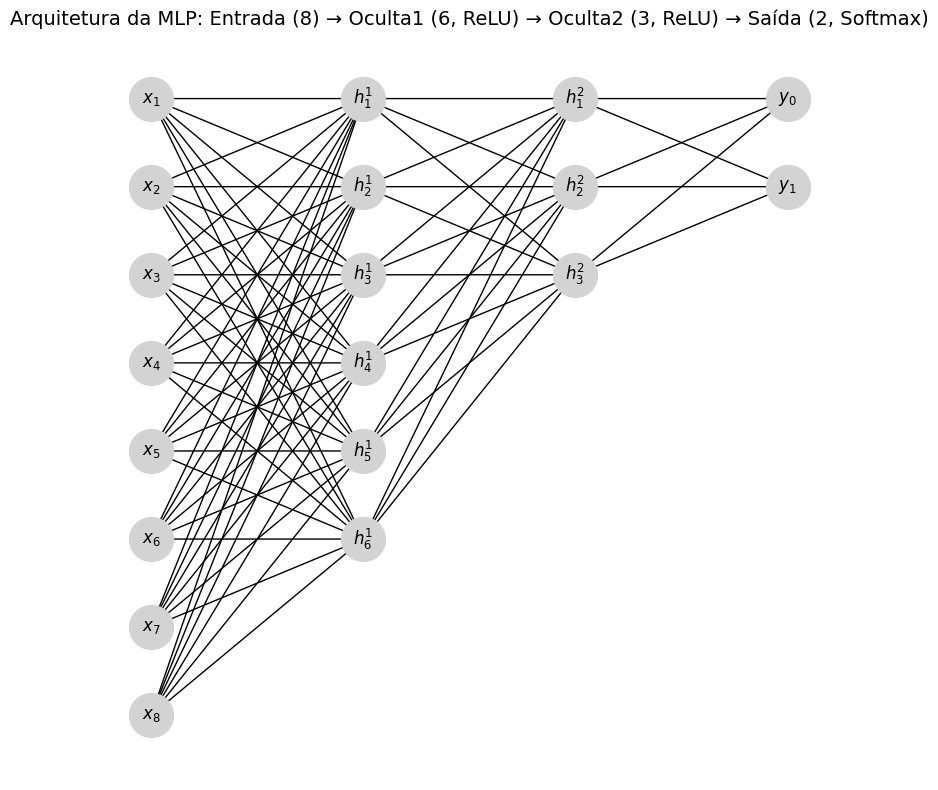

In [5]:
# @title MLP com ReLU nas camadas ocultas e Softmax na saída (2 camadas ocultas)

import matplotlib.pyplot as plt
import networkx as nx

# Criar grafo direcionado
G = nx.DiGraph()

# Camadas conforme a descrição
input_layer = [f'x_{i+1}' for i in range(8)]
hidden_layer1 = [f'h^1_{i+1}' for i in range(6)]
hidden_layer2 = [f'h^2_{i+1}' for i in range(3)]
output_layer = ['{y}_0', '{y}_1']

# Lista de camadas
layers = [input_layer, hidden_layer1, hidden_layer2, output_layer]
positions = {}
labels = {}
layer_dist = 2.0
node_dist = 1.0

# Posicionamento dos nós
for i, layer in enumerate(layers):
    for j, node in enumerate(layer):
        G.add_node(node)
        positions[node] = (i * layer_dist, -j * node_dist)
        labels[node] = f"${node}$"

# Conectar camadas
def connect_layers(layer1, layer2):
    for u in layer1:
        for v in layer2:
            G.add_edge(u, v)

connect_layers(input_layer, hidden_layer1)
connect_layers(hidden_layer1, hidden_layer2)
connect_layers(hidden_layer2, output_layer)

# Desenho
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, positions, node_color='lightgray', node_size=1000)
nx.draw_networkx_edges(G, positions, arrows=True, arrowstyle='-|>', width=1)
nx.draw_networkx_labels(G, positions, labels, font_size=12)
plt.title('Arquitetura da MLP: Entrada (8) → Oculta1 (6, ReLU) → Oculta2 (3, ReLU) → Saída (2, Softmax)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
# @title Importação dos dados
import pandas as pd

# URL do dataset
url = "https://raw.githubusercontent.com/pcbrom/perceptron-mlp-cnn/refs/heads/main/data/diabetes.csv"

# Carregar o dataset
df = pd.read_csv(url)

# Verificar dimensões
print(f"Shape do dataset: {df.shape}")

# Visualizar as primeiras linhas
display(df.head())

# Verificar estatísticas básicas
display(df.describe())

Shape do dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# @title Verificação de valores zero inválidos (biologicamente implausíveis)

# Colunas que não devem conter zero
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Contagem de zeros por coluna
invalid_zeros = (df[cols_with_invalid_zeros] == 0).sum()

print("Contagem de valores igual a zero (potencialmente inválidos):")
display(invalid_zeros)


Contagem de valores igual a zero (potencialmente inválidos):


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [8]:
# @title Remoção de linhas com valores zero inválidos

# Colunas que não devem conter zero
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Filtrar apenas linhas com valores válidos (não-zero) nas colunas indicadas
df_clean = df.copy()
for col in cols_with_invalid_zeros:
    df_clean = df_clean[df_clean[col] != 0]

# Verificar nova dimensão do conjunto de dados
print(f"Shape após remoção: {df_clean.shape}")


Shape após remoção: (392, 9)


In [9]:
# @title Padronização antes da divisão e One-Hot Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separar variáveis explicativas e alvo
X = df_clean.drop(columns='Outcome').values
y = df_clean['Outcome'].values.reshape(-1, 1)  # necessário para o encoder

# Padronizar (z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# 70% treino, 30% temporário (validação + teste)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y_encoded, test_size=0.30, stratify=y, random_state=42
)

# 15% validação, 15% teste
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Verificações
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}\n")


Tamanho do conjunto de treino: 274
Tamanho do conjunto de validação: 59
Tamanho do conjunto de teste: 59



In [10]:
# Hiperparâmetros
eta = 0.0001     # teste com outros valores (exercício)
epochs = 1500    # teste com outros valores (exercício)

Epoch 0 | Train Loss: 1.5929 | Val Loss: 1.8410
Epoch 100 | Train Loss: 0.4917 | Val Loss: 0.5796
Epoch 200 | Train Loss: 0.4656 | Val Loss: 0.5632
Epoch 300 | Train Loss: 0.4507 | Val Loss: 0.5566
Epoch 400 | Train Loss: 0.4397 | Val Loss: 0.5662
Epoch 500 | Train Loss: 0.4334 | Val Loss: 0.5768
Epoch 600 | Train Loss: 0.4295 | Val Loss: 0.5827
Epoch 700 | Train Loss: 0.4258 | Val Loss: 0.5882
Epoch 800 | Train Loss: 0.4226 | Val Loss: 0.5932
Epoch 900 | Train Loss: 0.4203 | Val Loss: 0.5991
Epoch 1000 | Train Loss: 0.4184 | Val Loss: 0.6035
Epoch 1100 | Train Loss: 0.4167 | Val Loss: 0.6064
Epoch 1200 | Train Loss: 0.4143 | Val Loss: 0.6045
Epoch 1300 | Train Loss: 0.4122 | Val Loss: 0.6054
Epoch 1400 | Train Loss: 0.4105 | Val Loss: 0.6064


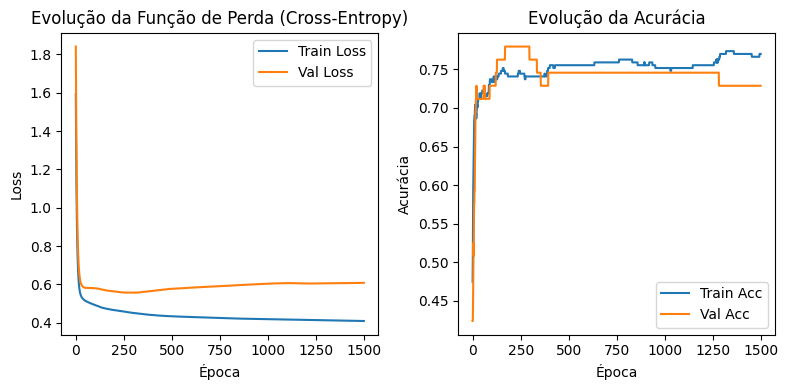

Acurácia no conjunto de teste: 0.7458


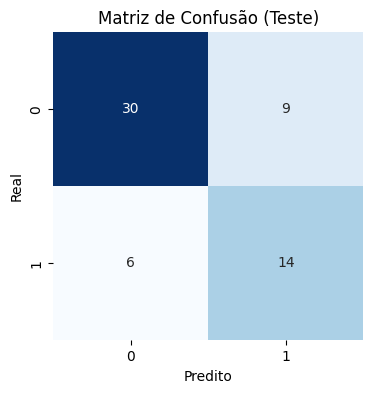


Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8333    0.7692    0.8000        39
           1     0.6087    0.7000    0.6512        20

    accuracy                         0.7458        59
   macro avg     0.7210    0.7346    0.7256        59
weighted avg     0.7572    0.7458    0.7495        59

Peso final W1[0,0]: 0.8271388985463952


In [11]:
# @title MLP com ReLU nas camadas ocultas e Softmax na saída (2 camadas ocultas) DG

import numpy as np
import matplotlib.pyplot as plt

# Arquitetura
n_input = X_train.shape[1]
n_hidden1 = 6
n_hidden2 = 3
n_output = 2  # saída one-hot

# Funções de ativação
def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(float)

def softmax(z):
    z_stable = z - np.max(z, axis=1, keepdims=True)  # estabilidade numérica
    exp_z = np.exp(z_stable)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_hat, y_true):
    eps = 1e-10
    return -np.mean(np.sum(y_true * np.log(y_hat + eps), axis=1))

# Inicialização
np.random.seed(42)
W1 = np.random.randn(n_input, n_hidden1)
b1 = np.zeros((1, n_hidden1))
W2 = np.random.randn(n_hidden1, n_hidden2)
b2 = np.zeros((1, n_hidden2))
W3 = np.random.randn(n_hidden2, n_output)
b3 = np.zeros((1, n_output))

# Histórico
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(epochs):
    # --- Forward (treino)
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    Z3 = A2 @ W3 + b3
    A3 = softmax(Z3)

    # --- Forward (validação)
    Z1v = X_val @ W1 + b1
    A1v = relu(Z1v)
    Z2v = A1v @ W2 + b2
    A2v = relu(Z2v)
    Z3v = A2v @ W3 + b3
    A3v = softmax(Z3v)

    # --- Loss
    train_loss = cross_entropy(A3, y_train)
    val_loss = cross_entropy(A3v, y_val)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

    # --- Acurácia
    train_pred = np.argmax(A3, axis=1)
    val_pred = np.argmax(A3v, axis=1)
    train_acc = np.mean(train_pred == np.argmax(y_train, axis=1))
    val_acc = np.mean(val_pred == np.argmax(y_val, axis=1))
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    # --- Backpropagation
    dZ3 = (A3 - y_train)  # derivada da softmax + cross-entropy
    dW3 = A2.T @ dZ3
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dZ2 = (dZ3 @ W3.T) * drelu(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = (dZ2 @ W2.T) * drelu(Z1)
    dW1 = X_train.T @ dZ1 # usa todos os dados simultaneamente
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # --- Atualização
    W3 -= eta * dW3
    b3 -= eta * db3
    W2 -= eta * dW2
    b2 -= eta * db2
    W1 -= eta * dW1
    b1 -= eta * db1

    # Log ocasional
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

# --- Gráficos
plt.figure(figsize=(8, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title('Evolução da Função de Perda (Cross-Entropy)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title('Evolução da Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Forward no conjunto de teste
Z1t = X_test @ W1 + b1
A1t = relu(Z1t)
Z2t = A1t @ W2 + b2
A2t = relu(Z2t)
Z3t = A2t @ W3 + b3
A3t = softmax(Z3t)

# Predição: classe com maior probabilidade
y_pred_test = np.argmax(A3t, axis=1)
y_true_test = np.argmax(y_test, axis=1)

# Acurácia
acc_test = accuracy_score(y_true_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc_test:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão (Teste)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Relatório completo (opcional)
print("\nRelatório de Classificação:")
print(classification_report(y_true_test, y_pred_test, digits=4, zero_division=1))

if epoch == epochs - 1:
    print("Peso final W1[0,0]:", W1[0, 0])


In [12]:
# Hiperparâmetros
eta = 0.0001     # teste com outros valores (exercício)
epochs = 1500    # teste com outros valores (exercício)

Epoch 0 | Train Loss: 1.4210 | Val Loss: 1.6519
Epoch 100 | Train Loss: 0.4914 | Val Loss: 0.5795
Epoch 200 | Train Loss: 0.4655 | Val Loss: 0.5634
Epoch 300 | Train Loss: 0.4505 | Val Loss: 0.5570
Epoch 400 | Train Loss: 0.4395 | Val Loss: 0.5671
Epoch 500 | Train Loss: 0.4334 | Val Loss: 0.5770
Epoch 600 | Train Loss: 0.4295 | Val Loss: 0.5828
Epoch 700 | Train Loss: 0.4258 | Val Loss: 0.5882
Epoch 800 | Train Loss: 0.4226 | Val Loss: 0.5932
Epoch 900 | Train Loss: 0.4202 | Val Loss: 0.5990
Epoch 1000 | Train Loss: 0.4184 | Val Loss: 0.6034
Epoch 1100 | Train Loss: 0.4166 | Val Loss: 0.6062
Epoch 1200 | Train Loss: 0.4142 | Val Loss: 0.6043
Epoch 1300 | Train Loss: 0.4122 | Val Loss: 0.6054
Epoch 1400 | Train Loss: 0.4105 | Val Loss: 0.6064


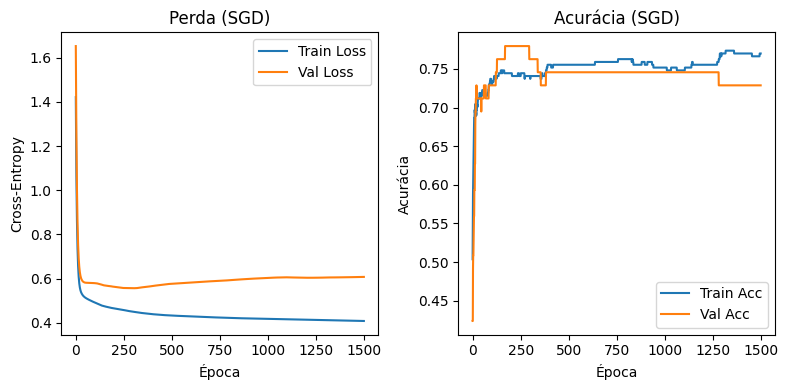

Acurácia no conjunto de teste: 0.7458


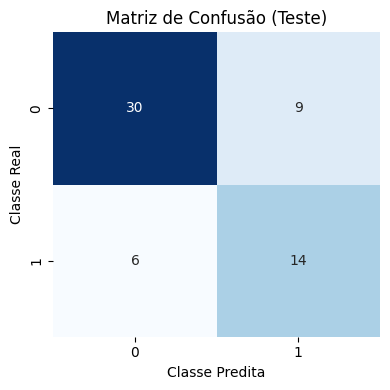


Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8333    0.7692    0.8000        39
           1     0.6087    0.7000    0.6512        20

    accuracy                         0.7458        59
   macro avg     0.7210    0.7346    0.7256        59
weighted avg     0.7572    0.7458    0.7495        59

Peso final W1[0,0]: 0.8264546783200991


In [13]:
# @title MLP com ReLU nas camadas ocultas e Softmax na saída (SGD - 2 camadas ocultas)

import numpy as np
import matplotlib.pyplot as plt

# Arquitetura
n_input = X_train.shape[1]
n_hidden1 = 6
n_hidden2 = 3
n_output = 2

# Funções
def relu(z): return np.maximum(0, z)
def drelu(z): return (z > 0).astype(float)
def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
def cross_entropy(y_hat, y_true):
    eps = 1e-10
    return -np.mean(np.sum(y_true * np.log(y_hat + eps), axis=1))

# Inicialização
np.random.seed(42)
W1 = np.random.randn(n_input, n_hidden1)
b1 = np.zeros((1, n_hidden1))
W2 = np.random.randn(n_hidden1, n_hidden2)
b2 = np.zeros((1, n_hidden2))
W3 = np.random.randn(n_hidden2, n_output)
b3 = np.zeros((1, n_output))

# Histórico
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    # --- Treinamento com SGD
    for i in range(X_train.shape[0]):
        xi = X_train[i:i+1]
        yi = y_train[i:i+1]

        # Forward
        Z1 = xi @ W1 + b1
        A1 = relu(Z1)
        Z2 = A1 @ W2 + b2
        A2 = relu(Z2)
        Z3 = A2 @ W3 + b3
        A3 = softmax(Z3)

        # Backprop
        dZ3 = (A3 - yi)
        dW3 = A2.T @ dZ3
        db3 = dZ3

        dZ2 = (dZ3 @ W3.T) * drelu(Z2)
        dW2 = A1.T @ dZ2
        db2 = dZ2

        dZ1 = (dZ2 @ W2.T) * drelu(Z1)
        dW1 = xi.T @ dZ1 # usa apenas uma amostra por vez
        db1 = dZ1

        # Atualização
        W3 -= eta * dW3
        b3 -= eta * db3
        W2 -= eta * dW2
        b2 -= eta * db2
        W1 -= eta * dW1
        b1 -= eta * db1

    # --- Avaliação por época (para gráfico)
    # Treino
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    Z3 = A2 @ W3 + b3
    A3 = softmax(Z3)
    train_loss = cross_entropy(A3, y_train)
    train_acc = np.mean(np.argmax(A3, axis=1) == np.argmax(y_train, axis=1))

    # Validação
    Z1v = X_val @ W1 + b1
    A1v = relu(Z1v)
    Z2v = A1v @ W2 + b2
    A2v = relu(Z2v)
    Z3v = A2v @ W3 + b3
    A3v = softmax(Z3v)
    val_loss = cross_entropy(A3v, y_val)
    val_acc = np.mean(np.argmax(A3v, axis=1) == np.argmax(y_val, axis=1))

    # Registro
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

# --- Gráficos
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title('Perda (SGD)')
plt.xlabel('Época')
plt.ylabel('Cross-Entropy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title('Acurácia (SGD)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# --- Forward completo no conjunto de teste
Z1t = X_test @ W1 + b1
A1t = relu(Z1t)
Z2t = A1t @ W2 + b2
A2t = relu(Z2t)
Z3t = A2t @ W3 + b3
A3t = softmax(Z3t)

# --- Predição final
y_pred_test = np.argmax(A3t, axis=1)
y_true_test = np.argmax(y_test, axis=1)

# --- Acurácia
acc_test = accuracy_score(y_true_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc_test:.4f}")

# --- Matriz de confusão
cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão (Teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()

# --- Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_true_test, y_pred_test, digits=4, zero_division=1))

if epoch == epochs - 1:
    print("Peso final W1[0,0]:", W1[0, 0])

# **Observação**

- O seed é o mesmo $\implies$ Os pesos iniciais são iguais.
- A taxa de aprendizado é muito baixa.
- O dataset é pequeno, e o número de épocas alto suaviza o ruído estocástico.

Ainda que os resultados sejam "iguais" a uma promeira vista, os processos são diferentes e podemos perceber olhando os pesos após o treinamento, por exeplo,

- GD: Peso final $W1[0,0]: 0.8271388985463952$.
- SGD: Peso final $W1[0,0]: 0.8264546783200991$.

# **Noções de Redes Convolucionais (CNN) com PyTorch**

- As redes convolucionais, Convolutional Neural Networks, (CNNs) são especialmente eficazes para tarefas que envolvem **dados com estrutura espacial**, como imagens.
- Sua principal vantagem é a capacidade de **aprender padrões locais** por meio de **filtros convolucionais**, reduzindo o número de parâmetros em comparação com redes totalmente conectadas.

---

## **Arquitetura de uma CNN**

[Site recomendado: Arquitetura de uma CNN](https://alexlenail.me/NN-SVG/LeNet.html)

A imagem abaixo ilustra todas as etapas de uma CNN típica, desde a entrada da imagem até a saída de classificação:

![CNN](https://cdn.hashnode.com/res/hashnode/image/upload/v1722198375823/1c6c0f55-6748-4c25-ad0d-4cff68b2a5f4.png?auto=compress,format&format=webp)
Fonte da figura: sisirdhakal.hashnode.dev

**Etapas Representadas:**
1. **Entrada**: Imagem de entrada (por exemplo, 28×28 pixels em tons de cinza).
2. **Camadas Convolucionais**: Aplicam filtros para extrair características locais.
3. **Funções de Ativação (ReLU)**: Introduzem não linearidade.
4. **Camadas de Pooling (Max Pooling)**: Reduzem a dimensionalidade espacial.
5. **Camada de Flattening**: Transforma os mapas de ativação em um vetor unidimensional.
6. **Camadas Totalmente Conectadas**: Realizam a classificação com base nas características extraídas.
7. **Camada de Saída (Softmax)**: Fornece as probabilidades associadas a cada classe.

## **Componentes fundamentais de uma CNN**

1. **Camada Convolucional (`nn.Conv2d`)** Aplica um conjunto de filtros (ou *kernels*) sobre a imagem de entrada. Cada filtro desliza sobre a imagem e gera um mapa de ativação.
  - **Quando usar:** Sempre que você quiser extrair padrões locais (bordas, texturas, formas) de imagens ou dados com estrutura espacial.
  -   **Função:** Aprende filtros treináveis que identificam características locais (ex: bordas verticais, linhas diagonais, texturas).

  ```python
  nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)
  ```
  - `in_channels=1` Número de canais de entrada. Uma imagem em escala de cinza tem 1 canal, uma imagem RGB tem 3.
  - `out_channels=8` Número de filtros (kernels) que a camada irá aprender. Cada filtro gera um mapa de ativação. Com 8 filtros, a saída terá 8 canais.
  - `kernel_size=3` Tamanho dos filtros convolucionais: $3 \times 3$.Isso significa que cada filtro examina uma vizinhança $3 \times 3$ da imagem em cada passo.

2. **Função de ativação, exemplo `(nn.ReLU)`**
  - **Quando usar:** Sempre após camadas convolucionais ou lineares, para adicionar não linearidade ao modelo.
  - **Função:** Permite que a rede aprenda funções não lineares, aumentando seu poder de representação.

3. **Pooling, exemplo `(nn.MaxPool2d)`** Reduz a dimensionalidade espacial (resolução), mantendo os valores máximos locais.
  - **Quando usar:** Logo após uma convolução + ativação, para reduzir a resolução espacial (dimensão da imagem) e manter as informações mais fortes.
  - **Função:** Reduz a complexidade e o número de parâmetros, tornando a rede mais eficiente e mais robusta a pequenas variações de posição (invariância local).

  ```python
  nn.MaxPool2d(kernel_size=2, stride=2)
  ```
  - `kernel_size=2` Define o tamanho da janela de pooling: $2 \times 2$. A camada seleciona o maior valor dentro de cada janela $2 \times 2$ da entrada.
  - `stride=2` Define o passo de deslocamento da janela: pula de 2 em 2 pixels. Isso reduz a dimensão da imagem pela metade (subamostragem).



### **Dataset MNIST**

- O Modified National Institute of Standards and Technology (MNIST) é um dos conjuntos de dados mais clássicos e utilizados para a introdução ao aprendizado profundo e CNN.
- Ele contém imagens de **dígitos manuscritos** de 0 a 9, escritas por diferentes pessoas.

[Site recomendado: Arquitetura de uma CNN](https://alexlenail.me/NN-SVG/LeNet.html)

A imagem abaixo ilustra todas as etapas de uma CNN típica, desde a entrada da imagem até a saída de classificação:

![MNIST](https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001.png)
Fonte da figura: https://www.mdpi.com/2076-3417/9/15/3169

---

#### **Características do MNIST**

- **Número de classes**: 10 (dígitos de `0` a `9`)
- **Número de imagens de treino**: 60.000
- **Número de imagens de teste**: 10.000
- **Formato das imagens**:  
  - Tamanho: $28 \times 28$ pixels  
  - Canais: 1 (tons de cinza, escala de 0 a 255)
- **Tipo dos dados**: imagens rotuladas

#### **Objetivo da Tarefa**

Treinar um modelo capaz de **reconhecer automaticamente o dígito manuscrito** em uma imagem, mesmo com diferentes estilos de escrita.


Época 1/5 | Loss Treino: 0.2916 | Loss Val: 0.0955 | Acc Treino: 90.58% | Acc Val: 96.94%
Época 2/5 | Loss Treino: 0.0784 | Loss Val: 0.0762 | Acc Treino: 97.72% | Acc Val: 97.82%
Época 3/5 | Loss Treino: 0.0602 | Loss Val: 0.0548 | Acc Treino: 98.20% | Acc Val: 98.31%
Época 4/5 | Loss Treino: 0.0473 | Loss Val: 0.0520 | Acc Treino: 98.53% | Acc Val: 98.49%
Época 5/5 | Loss Treino: 0.0404 | Loss Val: 0.0506 | Acc Treino: 98.71% | Acc Val: 98.60%


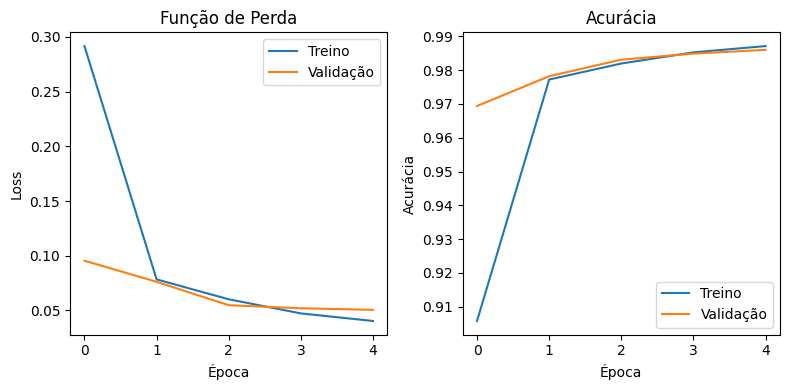

In [15]:
# @title CNN - Exemplo com MNIST

# Importação das bibliotecas principais
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Configuração do dispositivo: GPU (se disponível) ou CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pré-processamento das imagens
# - Converte para tensor
# - Normaliza com média e desvio padrão da base MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Carregamento do conjunto de treino completo e de teste
full_train = datasets.MNIST(root='.', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='.', train=False, transform=transform)

# Divisão do conjunto de treino em treino (50.000) e validação (10.000)
train_dataset, val_dataset = random_split(full_train, [50000, 10000])

# Criação dos DataLoaders (permitem leitura em mini-batches)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=1000, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Definição da arquitetura da rede convolucional (CNN)
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Primeira camada convolucional: 1 canal de entrada, 8 filtros 3x3
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        # Segunda camada convolucional: 8 canais de entrada, 16 filtros 3x3
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        # Camada de pooling para reduzir a dimensionalidade (janela 2x2)
        self.pool = nn.MaxPool2d(2, 2)
        # Camada totalmente conectada (após achatar para vetor)
        self.fc1 = nn.Linear(16 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 10)  # 10 classes (dígitos de 0 a 9)

    def forward(self, x):
        # Aplicação da sequência: convolução → ReLU → pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Achata a saída para vetor unidimensional
        x = x.view(-1, 16 * 5 * 5)
        # Camadas densas com ativação ReLU
        x = F.relu(self.fc1(x))
        # Saída final sem ativação (CrossEntropy já aplica Softmax internamente)
        return self.fc2(x)

# Instancia o modelo, define a função de perda e o otimizador
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()  # Perda para classificação multiclasse
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Parâmetros de treinamento
epochs = 5
train_loss_hist, val_loss_hist = [], []
train_acc_hist, val_acc_hist = [], []

# Loop de treinamento
for epoch in range(epochs):
    model.train()  # Modo treino
    train_loss, train_correct = 0, 0

    # Treinamento por mini-batches
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()           # Zera gradientes anteriores
        out = model(x)                  # Faz a previsão
        loss = criterion(out, y)        # Calcula o erro
        loss.backward()                 # Backpropagation
        optimizer.step()                # Atualiza os pesos

        train_loss += loss.item() * x.size(0)
        train_correct += (out.argmax(1) == y).sum().item()

    # Validação (sem atualização de pesos)
    model.eval()
    val_loss, val_correct = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = criterion(out, y)
            val_loss += loss.item() * x.size(0)
            val_correct += (out.argmax(1) == y).sum().item()

    # Armazena resultados
    train_loss_hist.append(train_loss / len(train_dataset))
    val_loss_hist.append(val_loss / len(val_dataset))
    train_acc_hist.append(train_correct / len(train_dataset))
    val_acc_hist.append(val_correct / len(val_dataset))

    # Exibe progresso
    print(f"Época {epoch+1}/{epochs} | Loss Treino: {train_loss_hist[-1]:.4f} | Loss Val: {val_loss_hist[-1]:.4f} | Acc Treino: {train_acc_hist[-1]*100:.2f}% | Acc Val: {val_acc_hist[-1]*100:.2f}%")

# Gráficos de desempenho por época
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(train_loss_hist, label="Treino")
plt.plot(val_loss_hist, label="Validação")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Função de Perda")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc_hist, label="Treino")
plt.plot(val_acc_hist, label="Validação")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Acurácia")
plt.legend()

plt.tight_layout()
plt.show()



Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9959    0.9889    0.9924       987
           1     0.9965    0.9930    0.9947      1139
           2     0.9971    0.9708    0.9837      1060
           3     0.9861    0.9910    0.9886      1005
           4     0.9827    0.9918    0.9872       973
           5     0.9877    0.9789    0.9833       900
           6     0.9854    0.9937    0.9895       950
           7     0.9796    0.9873    0.9834      1020
           8     0.9928    0.9787    0.9857       988
           9     0.9643    0.9949    0.9794       978

    accuracy                         0.9869     10000
   macro avg     0.9868    0.9869    0.9868     10000
weighted avg     0.9870    0.9869    0.9869     10000



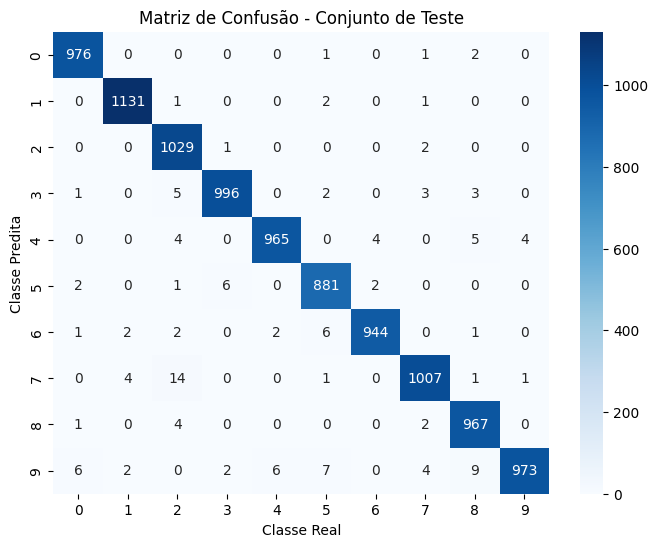

In [16]:
# @title Avaliação no conjunto de teste

# Avaliação no conjunto de teste
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        out = model(x)
        preds = out.argmax(1).cpu()
        y_true.extend(y.tolist())
        y_pred.extend(preds.tolist())

# Relatório de classificação com precisão, recall e F1-score
print("Relatório de Classificação:")
print(classification_report(y_pred, y_true, digits=4))

# Matriz de confusão
conf = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Conjunto de Teste")
plt.xlabel("Classe Real")
plt.ylabel("Classe Predita")
plt.show()